In [4]:
# Re-load the necessary libraries and dataset after execution state reset
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"D:\UKW_work\code\recipe_recommender_system\data\food_com_GeniusKitchen\RAW_recipes.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
# df.head()


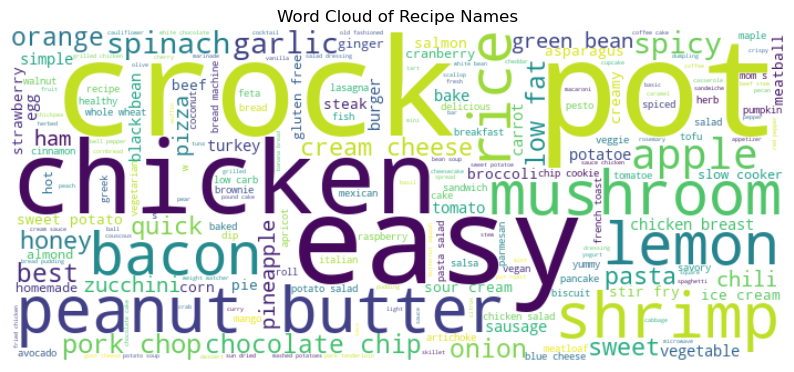

In [5]:
# Generate a word cloud for the recipe names
text_recipe_name = " ".join(df["name"].astype(str))

wordcloud_name = WordCloud(width=700, height=300, background_color="white").generate(text_recipe_name)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_name, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Recipe Names")
plt.show()

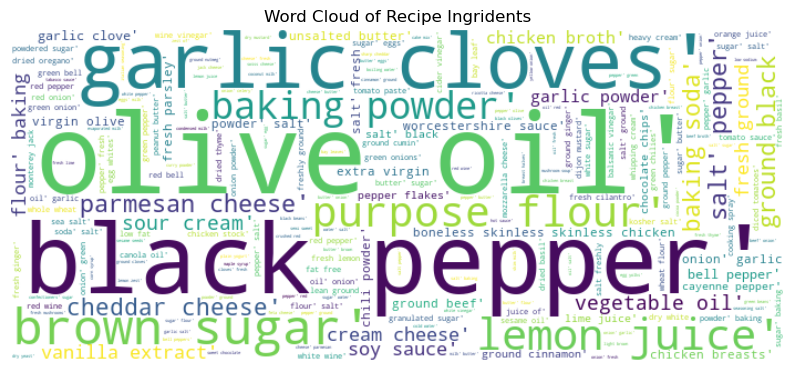

In [6]:
# Generate a word cloud for the recipe names
text_recipe_ingridents = " ".join(df["ingredients"].astype(str))

wordcloud_ingridents = WordCloud(width=700, height=300, background_color="white").generate(text_recipe_ingridents)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ingridents, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Recipe Ingridents")
plt.show()

# UMAP

In [8]:
# Re-attempting with correct UMAP import
import umap.umap_ as umap
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

In [9]:


# Extract ingredients column for feature processing
df["ingredients"] = df["ingredients"].astype(str)

# Vectorize ingredients using TF-IDF to capture important words
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_tfidf = vectorizer.fit_transform(df["ingredients"])

# Normalize the data before applying UMAP
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_tfidf)

# Apply UMAP for dimensionality reduction
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Add UMAP results to dataframe
df["UMAP_1"] = X_umap[:, 0]
df["UMAP_2"] = X_umap[:, 1]

# Create an interactive scatter plot with hover-over displaying full recipe details
fig = px.scatter(
    df, x="UMAP_1", y="UMAP_2",
    hover_data=["name", "ingredients", "minutes", "tags"],
    title="UMAP Clustering of Recipes based on Ingredients",
    labels={"UMAP_1": "UMAP Dimension 1", "UMAP_2": "UMAP Dimension 2"},
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Show plot
fig.show()


c:\Users\Steve\miniconda3\envs\recipe\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Steve\miniconda3\envs\recipe\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [12]:
# Set renderer to open in browser (fallback in case of notebook display issues)
import plotly.io as pio
pio.renderers.default = "browser"

# Create an interactive scatter plot with hover-over displaying full recipe details
fig = px.scatter(
    df, x="UMAP_1", y="UMAP_2",
    hover_data=["name", "ingredients", "minutes", "tags"],
    title="UMAP Clustering of Recipes based on Ingredients",
    labels={"UMAP_1": "UMAP Dimension 1", "UMAP_2": "UMAP Dimension 2"},
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Show plot
fig.show()

In [10]:
df

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,UMAP_1,UMAP_2
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,11.584292,5.445812
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,12.707353,8.125334
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,11.489022,4.884636
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,9.454019,6.808372
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,9.678120,-3.355518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,8.820565,-1.685370
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,10.246716,1.646307
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,14.930840,6.293443
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,19.067768,0.573191


## Make a new column= combined text (name + ingridents + minutes + nutrients + ....)

c:\Users\Steve\miniconda3\envs\recipe\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

c:\Users\Steve\miniconda3\envs\recipe\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\Steve\miniconda3\envs\recipe\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\Steve\miniconda3\envs\recipe\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\Steve\miniconda3\envs\recipe\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\Steve\miniconda3\envs\recipe\Lib\s

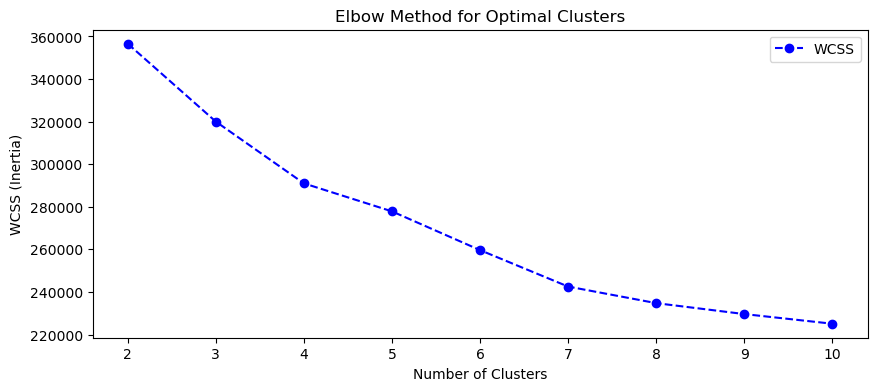

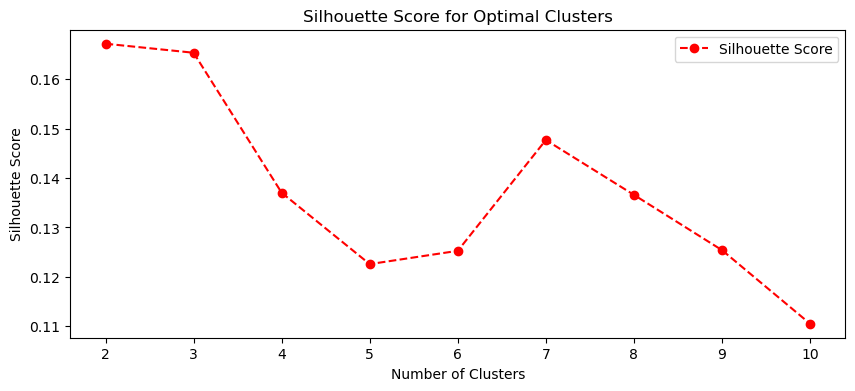

In [4]:
import pandas as pd
import numpy as np
import torch
import plotly.express as px
import umap.umap_ as umap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 📌 Load the dataset (Adjust sample size)
file_path = r"D:\UKW_work\code\recipe_recommender_system\data\food_com_GeniusKitchen\RAW_recipes.csv"
df = pd.read_csv(file_path).sample(10000, random_state=42)  # Reduce dataset size

# 📝 Concatenate all columns except 'id' into 'combined_text'
df = df.drop(columns=["id"], errors="ignore")
df["combined_text"] = df.apply(lambda row: " ".join(row.astype(str)), axis=1)

# ✨ TF-IDF Vectorization (Limited to 200 features)
vectorizer = TfidfVectorizer(stop_words='english', max_features=200)
X_tfidf = vectorizer.fit_transform(df["combined_text"])

# 🔄 Normalize Data
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_tfidf)

# 🔽 Apply PCA (10 components) before UMAP
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled.toarray())

# ✅ Convert to Torch tensor for efficient processing
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X_pca, dtype=torch.float32, device=device)

# 🔍 Function for batch-wise UMAP processing
def batch_umap(X_tensor, batch_size=1000):
    num_batches = X_tensor.shape[0] // batch_size + (X_tensor.shape[0] % batch_size != 0)
    umap_results = []

    for i in range(num_batches):
        batch = X_tensor[i * batch_size: (i + 1) * batch_size].cpu().numpy()
        umap_model = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=2, random_state=42)
        umap_results.append(umap_model.fit_transform(batch))

    return np.vstack(umap_results)

# 🚀 Apply UMAP with batch processing
X_umap = batch_umap(X_tensor, batch_size=1000)

# 🎯 Add UMAP results to dataframe
df["UMAP_1"] = X_umap[:, 0]
df["UMAP_2"] = X_umap[:, 1]

# 📊 Find optimal clusters using Elbow Method & Silhouette Score
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, n_init=10, batch_size=1000)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, cluster_labels))

# 📌 Plot Elbow Method
plt.figure(figsize=(10, 4))
plt.plot(cluster_range, wcss, marker='o', linestyle='--', color='b', label='WCSS')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal Clusters')
plt.legend()
plt.show()

# 📌 Plot Silhouette Score
plt.figure(figsize=(10, 4))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='r', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.legend()
plt.show()



In [5]:

pio.renderers.default = "browser"

# 🏆 Choose optimal clusters based on highest silhouette score
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]

# ✅ Apply MiniBatchKMeans with optimal clusters
kmeans = MiniBatchKMeans(n_clusters=optimal_clusters, random_state=42, n_init=10, batch_size=1000)
df["cluster"] = kmeans.fit_predict(X_pca)

# 🎨 Create interactive scatter plot with hover-over full recipe details
fig = px.scatter(
    df, x="UMAP_1", y="UMAP_2",
    color="cluster",
    hover_data=["name", "ingredients", "minutes", "tags"],
    title=f"KMeans Clustering of Recipes ({optimal_clusters} Clusters, UMAP Projection)",
    labels={"UMAP_1": "UMAP Dimension 1", "UMAP_2": "UMAP Dimension 2", "cluster": "Cluster"},
    color_continuous_scale=px.colors.qualitative.Set1
)

# 📌 Show plot
fig.show()

In [6]:

import plotly.io as pio
pio.renderers.default = "browser"


# ✅ Apply MiniBatchKMeans with optimal clusters
kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, n_init=10, batch_size=1000)
df["cluster"] = kmeans.fit_predict(X_pca)

# 🎨 Create interactive scatter plot with hover-over full recipe details
fig = px.scatter(
    df, x="UMAP_1", y="UMAP_2",
    color="cluster",
    hover_data=["name", "ingredients", "minutes", "tags"],
    title="KMeans Clustering of Recipes (5 Clusters, UMAP Projection)",
    labels={"UMAP_1": "UMAP Dimension 1", "UMAP_2": "UMAP Dimension 2", "cluster": "Cluster"},
    color_continuous_scale=px.colors.qualitative.Set1
)


# 📌 Show plot
fig.show()

In [8]:
df_cluster_0 = df[df['cluster']==0].reset_index(drop=True)
df_cluster_0

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,combined_text,UMAP_1,UMAP_2,cluster
0,curried bean salad,20,300249,2010-06-08,"['curries', '30-minutes-or-less', 'time-to-mak...","[256.0, 2.0, 40.0, 18.0, 18.0, 1.0, 18.0]",4,"['drain & rinse beans', 'stir all ingredients ...",serve this flavorful and refreshing salad as a...,"['garbanzo beans', 'black beans', 'onion', 'gi...",12,curried bean salad 20 300249 2010-06-08 ['curr...,8.608634,6.311052,0
1,mixed baby greens with oranges grapefruit and...,15,1533,2004-01-01,"['15-minutes-or-less', 'time-to-make', 'course...","[212.8, 24.0, 30.0, 0.0, 4.0, 11.0, 6.0]",2,['in a salad bowl combine the lettuce with the...,i love grapefruit in a salad and this one is p...,"['mixed baby greens', 'oranges', 'grapefruit',...",8,mixed baby greens with oranges grapefruit and...,7.634310,7.699058,0
2,pilgrim s cole slaw,130,394085,2007-09-25,"['time-to-make', 'course', 'main-ingredient', ...","[204.5, 19.0, 54.0, 10.0, 5.0, 8.0, 7.0]",7,"['shred the cabbage into 1 / 4-inch slices', '...",this recipe was passed out today with samples ...,"['cabbage', 'dried cranberries', 'pineapple ch...",9,pilgrim s cole slaw 130 394085 2007-09-25 ['ti...,6.501117,8.548776,0
3,creme de menthe chocolate vanilla drink,5,6357,2005-03-04,"['15-minutes-or-less', 'time-to-make', 'course...","[204.2, 11.0, 81.0, 5.0, 19.0, 23.0, 8.0]",3,"['put everything in a blender', 'cover and pro...",this is my own recipe and i enjoyed it alot to...,"['andes mints candies', 'low-fat milk', 'coffe...",4,creme de menthe chocolate vanilla drink 5 6357...,5.047611,9.552737,0
4,barbecue coca cola sauce,5,53366,2002-08-30,"['15-minutes-or-less', 'time-to-make', 'course...","[70.8, 0.0, 60.0, 20.0, 1.0, 0.0, 5.0]",5,"['mix all ingredients together', 'coat meat in...",this barbecue sauce is so versatile & such a c...,"['onion', 'ketchup', 'coca-cola', 'worcestersh...",7,barbecue coca cola sauce 5 53366 2002-08-30 ['...,9.421072,8.459028,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,malibu mixer,2,450004,2008-09-22,"['15-minutes-or-less', 'time-to-make', 'course...","[183.5, 0.0, 83.0, 0.0, 0.0, 0.0, 8.0]",1,['mix all together in a pretty glass and sit b...,"kind of like a pina colada, but a bit lighter,...","['pineapple juice', 'lemonade', 'malibu rum', ...",4,malibu mixer 2 450004 2008-09-22 ['15-minutes-...,6.359354,3.113831,0
1715,ice palace,3,330545,2007-12-20,"['15-minutes-or-less', 'time-to-make', 'course...","[96.3, 0.0, 23.0, 0.0, 0.0, 0.0, 2.0]",2,['shake all ingredients with ice and strain in...,found this while researching galliano recipes....,"['light rum', 'galliano', 'apricot brandy', 'p...",6,ice palace 3 330545 2007-12-20 ['15-minutes-or...,4.575778,12.318179,0
1716,sangria barcelona,40,237783,2007-05-26,"['60-minutes-or-less', 'time-to-make', 'course...","[1218.2, 1.0, 554.0, 5.0, 9.0, 0.0, 57.0]",9,['make simple syrup by combining water and sug...,good for when you're grillin' and chillin',"['dry red wine', 'club soda', 'lemon juice', '...",11,sangria barcelona 40 237783 2007-05-26 ['60-mi...,8.601095,2.650707,0
1717,vera s apple pie in a jar,65,478599,2007-08-01,"['time-to-make', 'course', 'main-ingredient', ...","[232.7, 0.0, 202.0, 4.0, 0.0, 0.0, 20.0]",5,['combine everything but the apples and lemon ...,i've tasted this recipe many times. the apple...,"['apples', 'sugar', 'cornstarch', 'cinnamon', ...",8,vera s apple pie in a jar 65 478599 2007-08-01...,6.557163,2.434150,0


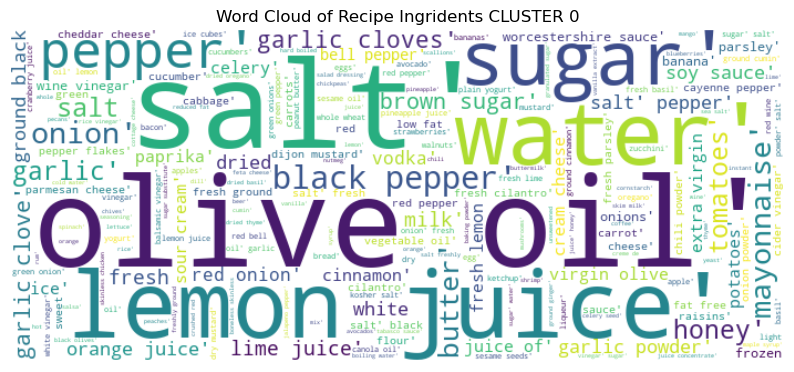

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for the recipe names
text_recipe_ingridents0 = " ".join(df_cluster_0["ingredients"].astype(str))

wordcloud_ingridents0 = WordCloud(width=700, height=300, background_color="white").generate(text_recipe_ingridents0)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ingridents0, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Recipe Ingridents CLUSTER 0")
plt.show()

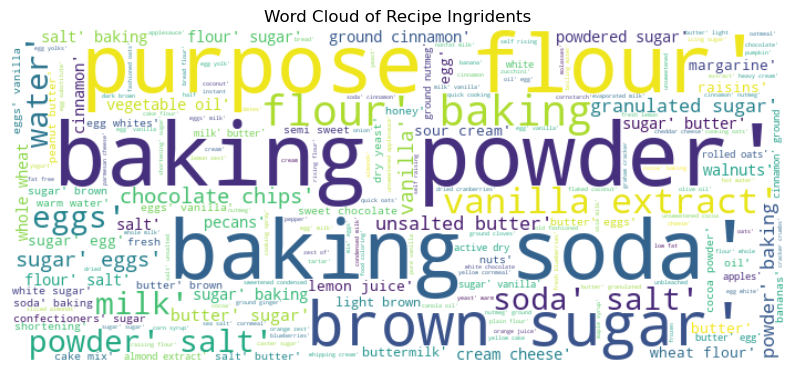

In [11]:
df_cluster_1 = df[df['cluster']==1].reset_index(drop=True)
# Generate a word cloud for the recipe names
text_recipe_ingridents1 = " ".join(df_cluster_1["ingredients"].astype(str))

wordcloud_ingridents1 = WordCloud(width=700, height=300, background_color="white").generate(text_recipe_ingridents1)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ingridents1, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Recipe Ingridents")
plt.show()

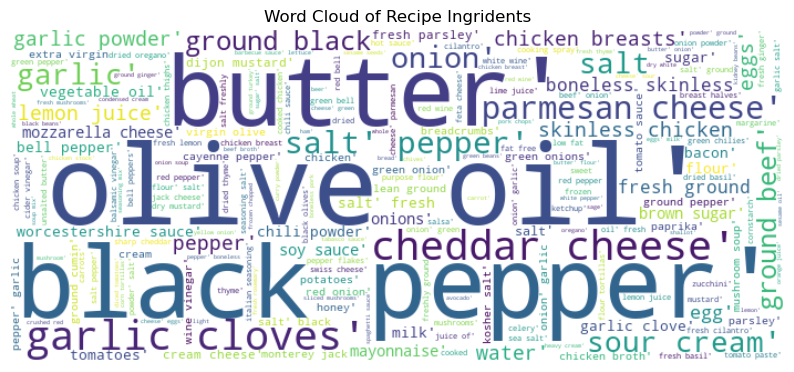

In [12]:
df_cluster_2 = df[df['cluster']==2].reset_index(drop=True)
# Generate a word cloud for the recipe names
text_recipe_ingridents2 = " ".join(df_cluster_2["ingredients"].astype(str))

wordcloud_ingridents2 = WordCloud(width=700, height=300, background_color="white").generate(text_recipe_ingridents2)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ingridents2, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Recipe Ingridents")
plt.show()

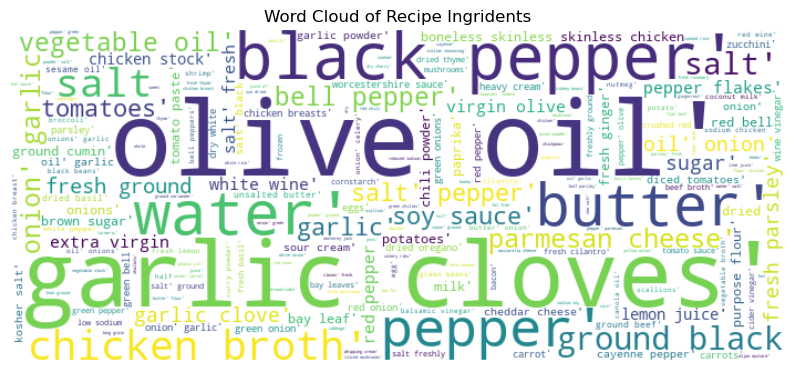

In [13]:
df_cluster_3 = df[df['cluster']==3].reset_index(drop=True)
# Generate a word cloud for the recipe names
text_recipe_ingridents3 = " ".join(df_cluster_3["ingredients"].astype(str))

wordcloud_ingridents3 = WordCloud(width=700, height=300, background_color="white").generate(text_recipe_ingridents3)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ingridents3, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Recipe Ingridents")
plt.show()

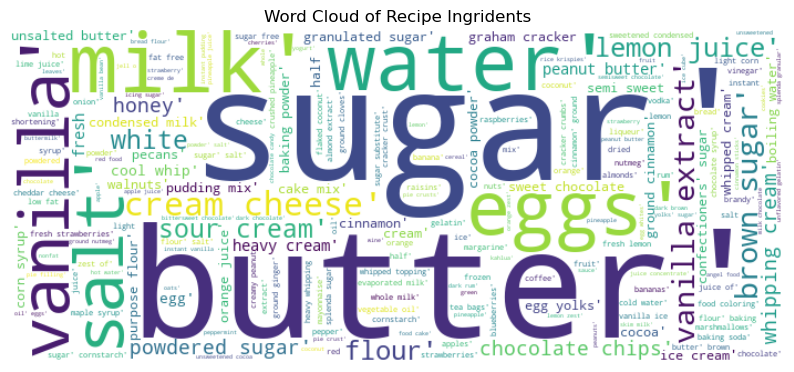

In [14]:
df_cluster_4 = df[df['cluster']==4].reset_index(drop=True)
# Generate a word cloud for the recipe names
text_recipe_ingridents4 = " ".join(df_cluster_4["ingredients"].astype(str))

wordcloud_ingridents4 = WordCloud(width=700, height=300, background_color="white").generate(text_recipe_ingridents4)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ingridents4, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Recipe Ingridents")
plt.show()